Project Objective

The goal of this project is to build and evaluate classification models to distinguish between edible and poisonous mushrooms based on numerical input features.

The task includes the following steps:

    Data understanding and preprocessing

        Load and explore the dataset

        Analyze correlations and remove redundant features

        Apply feature scaling to ensure comparability across models

    Model training and evaluation

        Train three models: Logistic Regression, K-Nearest Neighbors (KNN), and Decision Tree

        Evaluate each model using accuracy, precision, recall, F1-score, and ROC curves

        Analyze confusion matrices and compare model performance

    Feature importance analysis

        Identify the most influential features for each model

        Compare feature rankings across models using bar plots and heatmaps

    Interpretation and comparison

        Discuss strengths and weaknesses of each model

        Provide insights into the trade-off between accuracy and interpretability

This workflow simulates a typical applied machine learning project and is designed to be transferable to real-world client applications.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


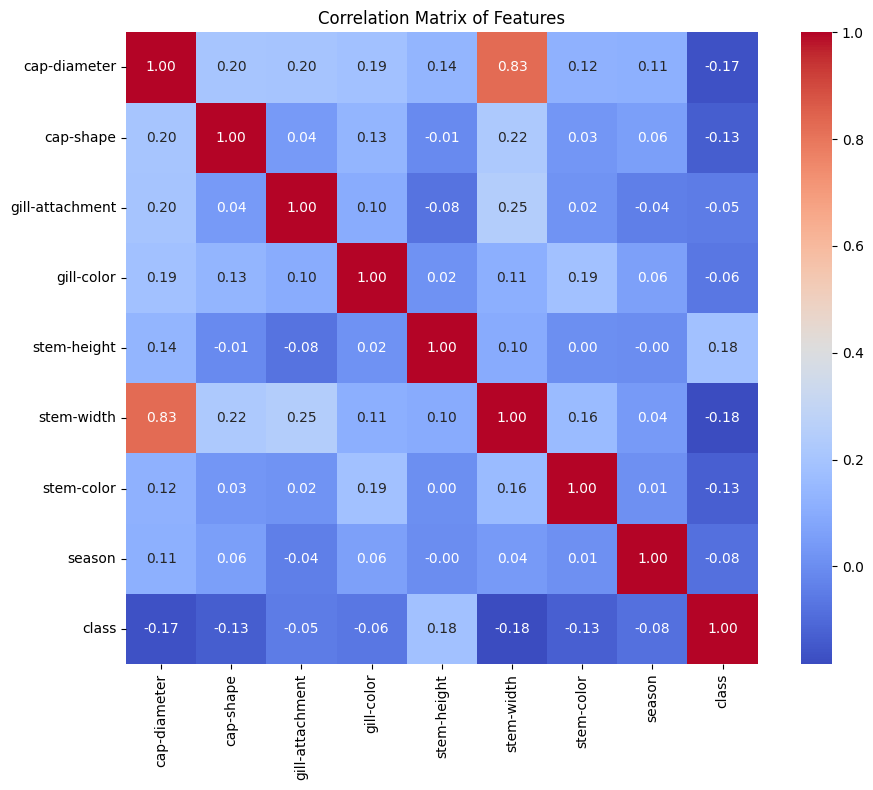

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import data
df = pd.read_csv('mushroom.csv') 
df.info()
df.describe(include='all')

#to gain information on the data, a correlation matrix of all features is created
corr_matrix = df.corr()

# visualize
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Features")
plt.tight_layout()

plt.savefig('corrMatrix.png')
plt.show()

In [58]:
#Feature selection
#stem-width and cap-diameter have a correlation of 83%, which can easily confuse the LogisticRegression Model. So it will be deleted for all models

# target: which feature correlates better with y?
import numpy as np
from scipy.stats import pointbiserialr

X,y = df[['cap-diameter','cap-shape','gill-attachment','gill-color','stem-height','stem-width','stem-color','season']], df['class']
r_a, _ = pointbiserialr(X['stem-width'], y)
r_b, _ = pointbiserialr(X['cap-diameter'], y)

# higher number > greater correlation
if abs(r_a) > abs(r_b):
    print("Keep stem-width, delete cap-diameter")
else:
    print("Keep cap-diameter, delete stem-width")
print(r_a, r_b)


Keep stem-width, delete cap-diameter
-0.1828561879918076 -0.16567629997156513


In [59]:
#as the KNeighborsClassifier needs numeric data to be scaled, I will do that before training any model and use only scaled data in all models.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = X.astype(float)
X.loc[:, :] = scaler.fit_transform(X)

for comparison only absolute values, generally it gives positive and negative values to indicate the tendency of feature to y


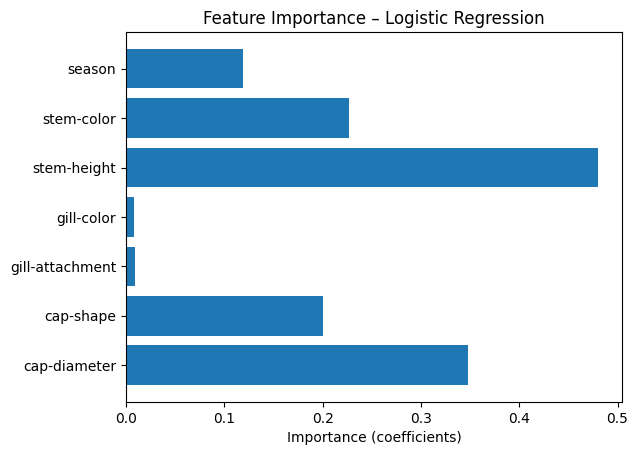

In [60]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    accuracy_score
)

X_train, X_test, y_train, y_test = train_test_split(X[['cap-diameter','cap-shape','gill-attachment','gill-color','stem-height','stem-color','season']], y, test_size=0.33, random_state=31)

logistic_regr = linear_model.LogisticRegression(max_iter = 500, random_state=42) #else ConvergenceWarning
logistic_regr.fit(X_train, y_train)

predict = logistic_regr.predict(X_test)

for i,number in enumerate(predict):
    if number <.5: predict[i] = 0
    else:predict[i] = 1

#Visualization
importance = logistic_regr.coef_[0]

print('for comparison only absolute values, generally it gives positive and negative values to indicate the tendency of feature to y')

# Plot
import matplotlib.pyplot as plt
#plt.bar(range(len(importance)), importance)
plt.barh(X_train.columns, abs(importance))
#plt.xlabel('Feature index')
plt.xlabel('Importance (coefficients)')
plt.title('Feature Importance – Logistic Regression')
plt.savefig('FeatureImportance_logistic.png')

plt.show()


In [61]:
def visualizations(model, X_test, y_test, predict, name, display_labels=["Edible", "Poisonous"]):
    # === Confusion Matrix ===
    cm = confusion_matrix(y_test, predict)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    disp.plot(cmap="Blues")
    #plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.savefig('ConfusionMatrix_'+name+'.png')
    plt.show()
    
    # === ROC Curve ===
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title("ROC Curve")
    plt.tight_layout()
    plt.savefig('ROC_Curve_'+name+'.png')
    plt.show()
    
    accuracy = accuracy_score(y_test, predict)
    print(f"Accuracy: {accuracy:.2%}")
    
    # === Classification Report ===
    report = classification_report(y_test, predict, target_names=display_labels, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    return report_df

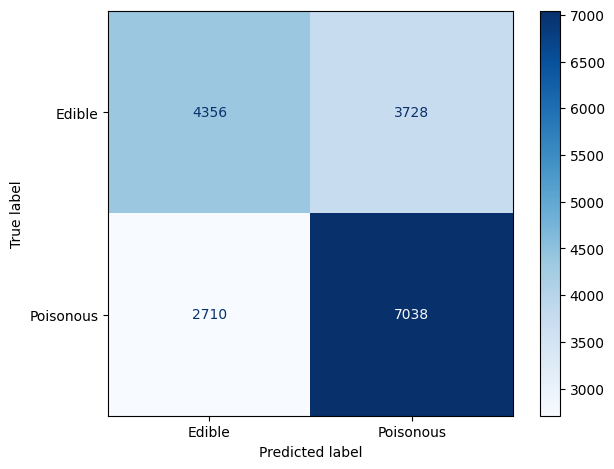

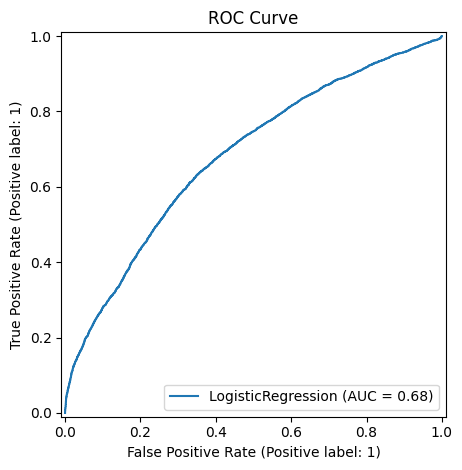

Accuracy: 63.90%


,precision,recall,f1-score,support
Edible,0.616473,0.538842,0.575050,8084.000000
Poisonous,0.653725,0.721994,0.686166,9748.000000
accuracy,0.638964,0.638964,0.638964,0.638964
macro avg,0.635099,0.630418,0.630608,17832.000000
weighted avg,0.636837,0.638964,0.635792,17832.000000


In [62]:
visualizations(model = logistic_regr, X_test=X_test, y_test=y_test, predict=predict, name= 'LR')

Trainingszeit: 0.0538 Sekunden
Vorhersagezeit: 0.7228 Sekunden
takes the most time - for visualization of features
Permutation_time: 102.2369 Sekunden


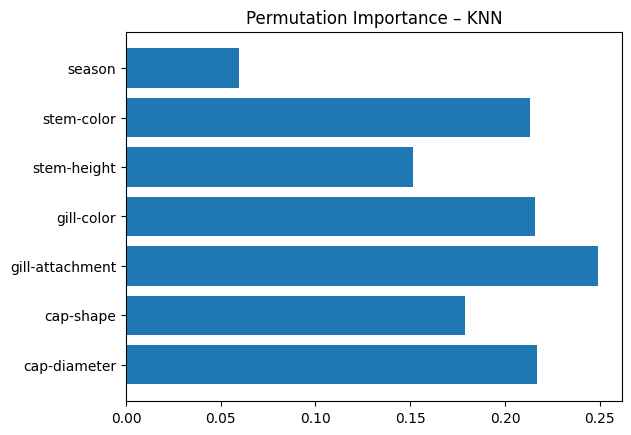

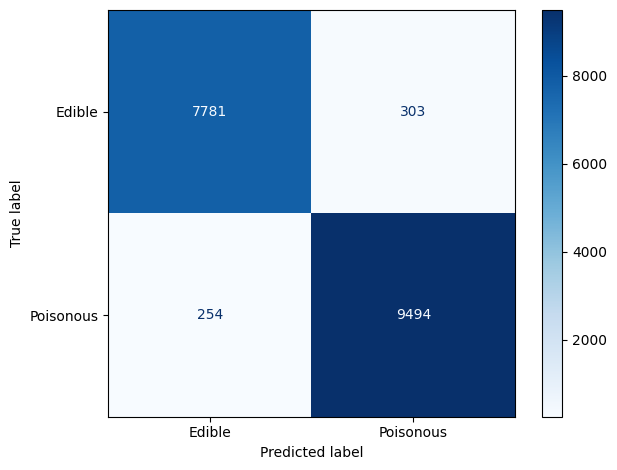

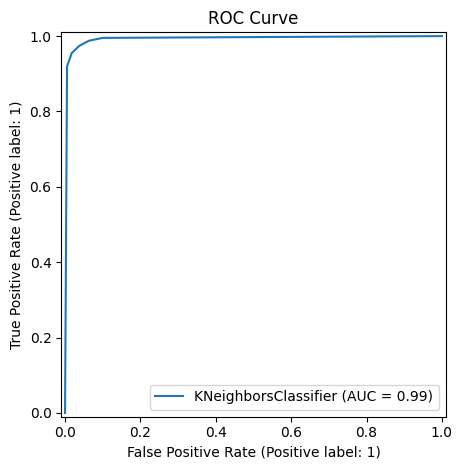

Accuracy: 96.88%


,precision,recall,f1-score,support
Edible,0.968388,0.962519,0.965445,8084.000000
Poisonous,0.969072,0.973943,0.971502,9748.000000
accuracy,0.968764,0.968764,0.968764,0.968764
macro avg,0.968730,0.968231,0.968473,17832.000000
weighted avg,0.968762,0.968764,0.968756,17832.000000


In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
import time

knn = KNeighborsClassifier(n_neighbors = 5) #, algorithm = 'kd_tree')
#kd_tree can be faster - if
#features < 20 and all numeric!!!
#else:dont set algorithm

start = time.time()
knn.fit(X_train, y_train)
knn_fit_time = time.time() - start

print(f"Trainingszeit: {knn_fit_time:.4f} Sekunden")

start = time.time()
predict = knn.predict(X_test)
knn_predict_time = time.time() - start

print(f"Vorhersagezeit: {knn_predict_time:.4f} Sekunden")

X_reduced = X[['cap-diameter','cap-shape','gill-attachment','gill-color','stem-height','stem-color','season']]

start = time.time()

print('takes the most time - for visualization of features')
result = permutation_importance(knn, X_reduced, y, n_repeats=5, random_state=0)
permutation_time = time.time() - start
print(f"Permutation_time: {permutation_time:.4f} Sekunden")


importance = result.importances_mean
plt.barh(X_reduced.columns, importance)
plt.title('Permutation Importance – KNN')
plt.savefig('FeatureImportance_KNN.png')
plt.show()

visualizations(model = knn, X_test=X_test, y_test=y_test, predict=predict, name= 'knn')

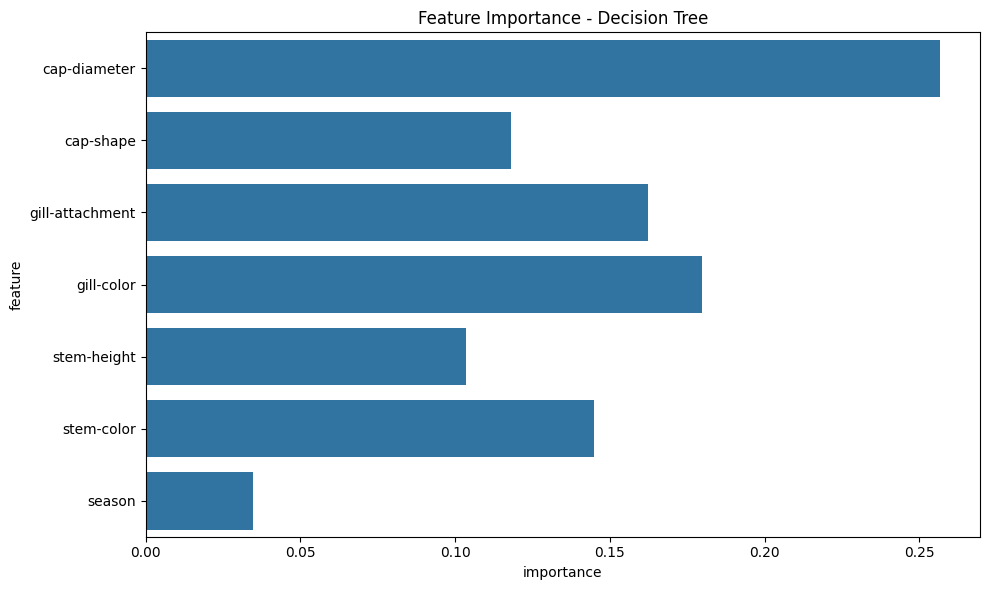

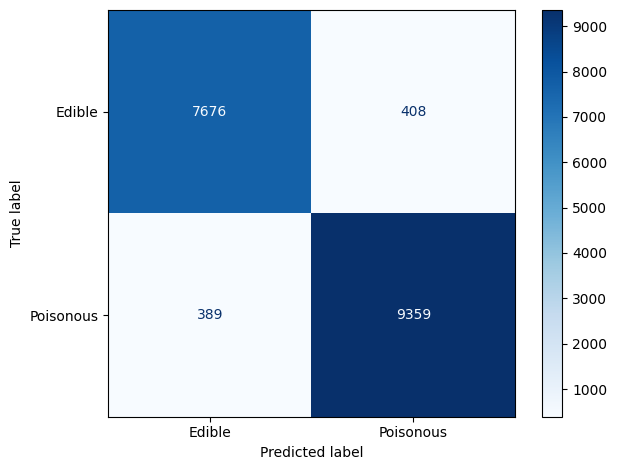

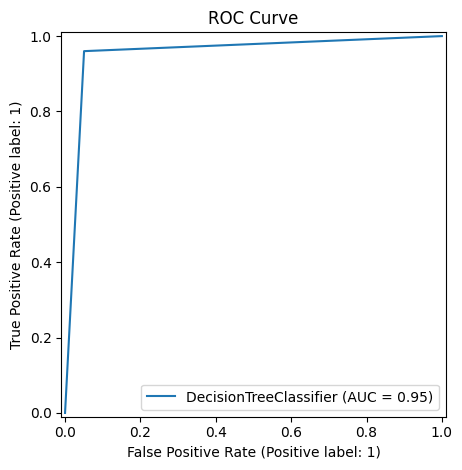

Accuracy: 95.53%


,precision,recall,f1-score,support
Edible,0.951767,0.949530,0.950647,8084.000000
Poisonous,0.958227,0.960094,0.959160,9748.000000
accuracy,0.955305,0.955305,0.955305,0.955305
macro avg,0.954997,0.954812,0.954903,17832.000000
weighted avg,0.955298,0.955305,0.955301,17832.000000


In [64]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
#tree.plot_tree(dtree, 'cap-diameter','cap-shape','gill-attachment','gill-color','stem-height','stem-width','stem-color','season')
y_pred = dtree.predict(X_test)

model = dtree

# === Feature Importance Plot ===
importances = model.feature_importances_
feat_imp_df = pd.DataFrame({'feature': X_reduced.columns, 'importance': importances})
#feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False)

feat_imp_df.T #to have same order

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='importance', y='feature')

#plt.barh(X_reduced.columns, feat_imp_df)


plt.title("Feature Importance - Decision Tree")
plt.tight_layout()


plt.savefig('FeatureImportance_DTree.png')
plt.show()

visualizations(model = dtree, X_test=X_test, y_test=y_test, predict=y_pred, name= 'tree')

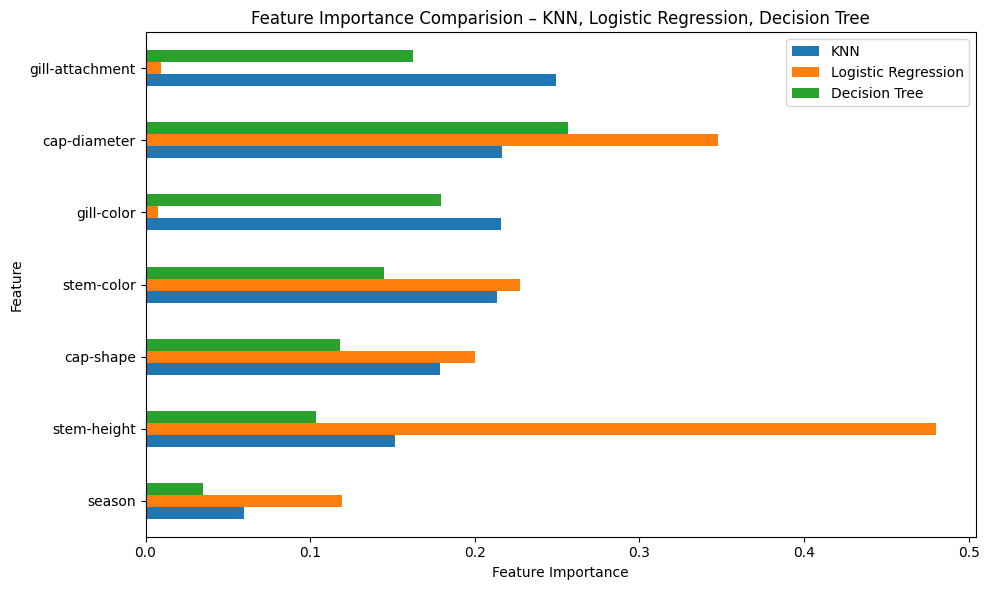

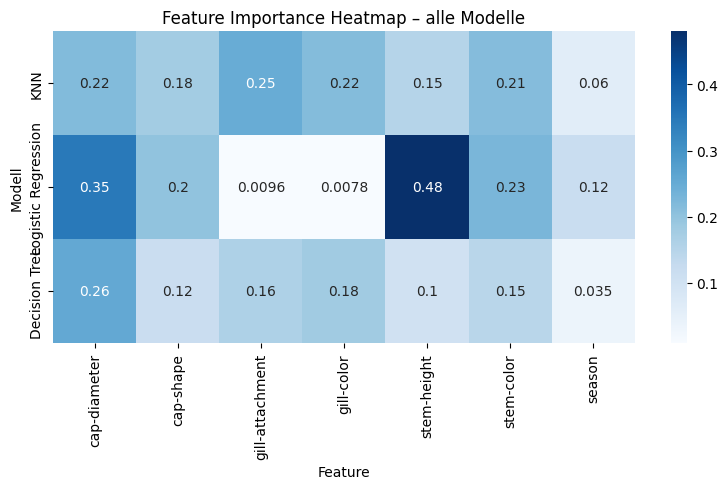

In [65]:
features = X_reduced.columns

# Prepare Feature Importances 
importance_knn = result.importances_mean  # von permutation_importance()
importance_logreg = np.abs(logistic_regr.coef_[0])  # Betrag der Koeffizienten
importance_tree = dtree.feature_importances_

# In DataFrame 
df_all = pd.DataFrame({
    'Feature': features,
    'KNN': importance_knn,
    'Logistic Regression': importance_logreg,
    'Decision Tree': importance_tree
})
df_all = df_all.set_index('Feature')
df_all_sorted = df_all.sort_values(by='KNN', ascending=True)  # oder nach Mittelwert

df_all_sorted.plot(kind='barh', figsize=(10, 6))
plt.xlabel('Feature Importance')
plt.title('Feature Importance Comparision – KNN, Logistic Regression, Decision Tree')
plt.tight_layout()
plt.savefig("Features_bars.png")
plt.show()

plt.figure(figsize=(8, 5))
sns.heatmap(df_all.T, annot=True, cmap='Blues')
plt.title('Feature Importance Heatmap – alle Modelle')
plt.ylabel('Modell')
plt.xlabel('Feature')
plt.tight_layout()
plt.savefig("Features_heatmap.png")

plt.show()

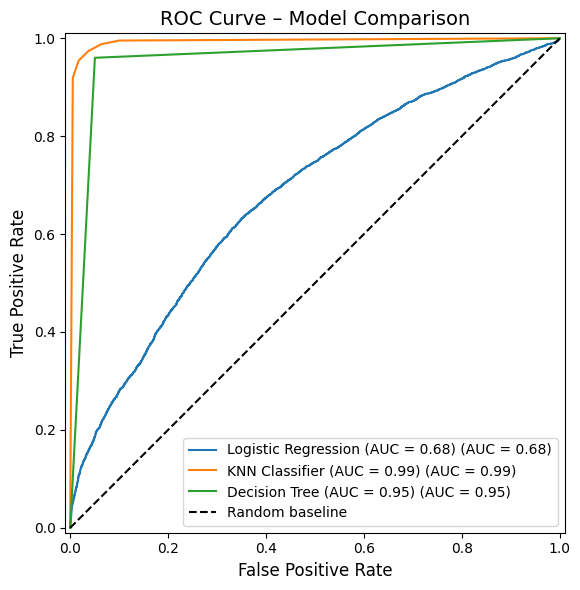

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_auc_score

# Calculate AUC
model_names = ["Logistic Regression", "KNN Classifier", "Decision Tree"]
models = [logistic_regr, knn, dtree]

colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Blue, Orange, Green

plt.figure(figsize=(8, 6))

for model, name, color in zip(models, model_names, colors):
    RocCurveDisplay.from_estimator(
        model, X_test, y_test,
        name=f"{name} (AUC = {roc_auc_score(y_test, model.predict_proba(X_test)[:,1]):.2f})",
        ax=plt.gca(),
        color=color
    )

# Random baseline
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random baseline')

# graph
plt.title("ROC Curve – Model Comparison", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.tight_layout()
plt.savefig("ROC_Curve_all_models.png", dpi=150)  #for sharpness
plt.show()


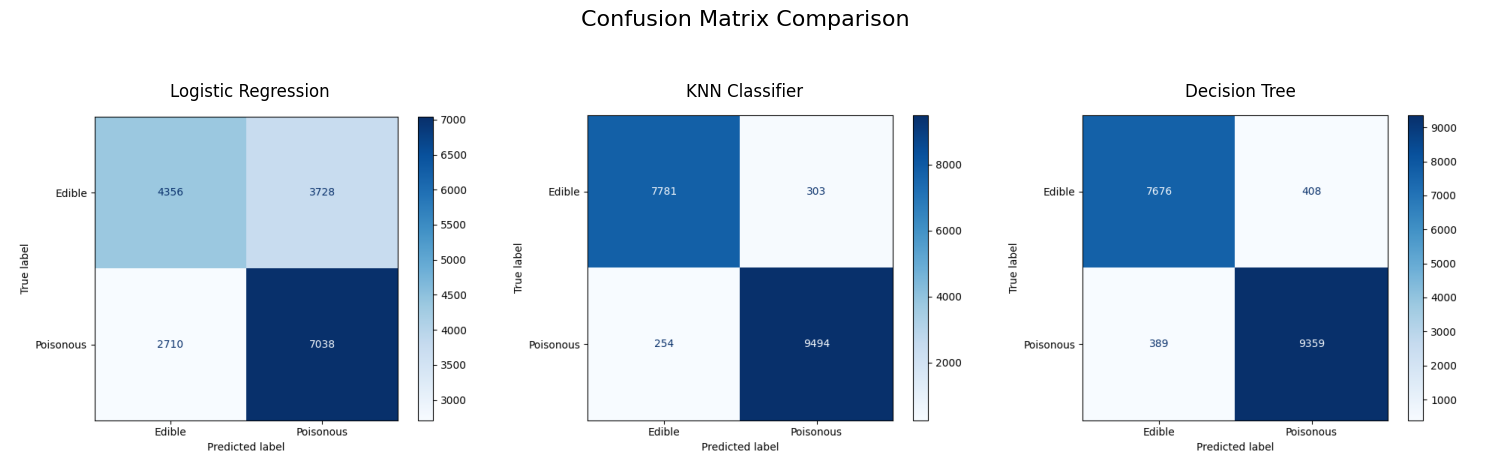

In [67]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

paths = [
    ("ConfusionMatrix_LR.png", "Logistic Regression"),
    ("ConfusionMatrix_knn.png", "KNN Classifier"),
    ("ConfusionMatrix_tree.png", "Decision Tree")
]

# Plot 
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Confusion Matrix Comparison", fontsize=16)

# Images
for ax, (path, title) in zip(axes, paths):
    img = mpimg.imread(path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(title, fontsize=12)

# Layout und Save
plt.tight_layout(rect=[0, 0, 1, 0.93])  # Space for title above
plt.savefig("confusion_matrix_comparison.png", dpi=150)
plt.show()

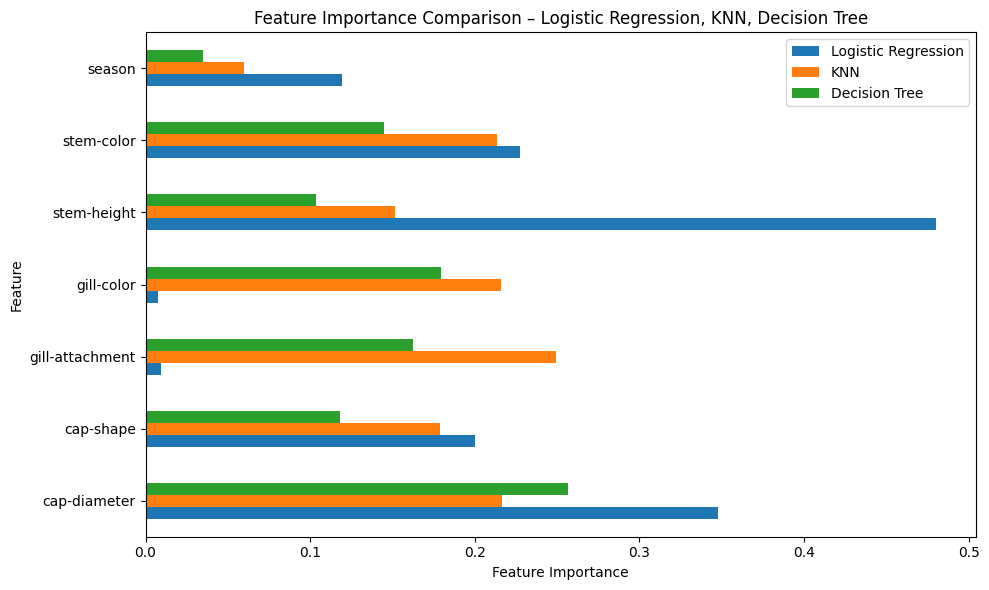

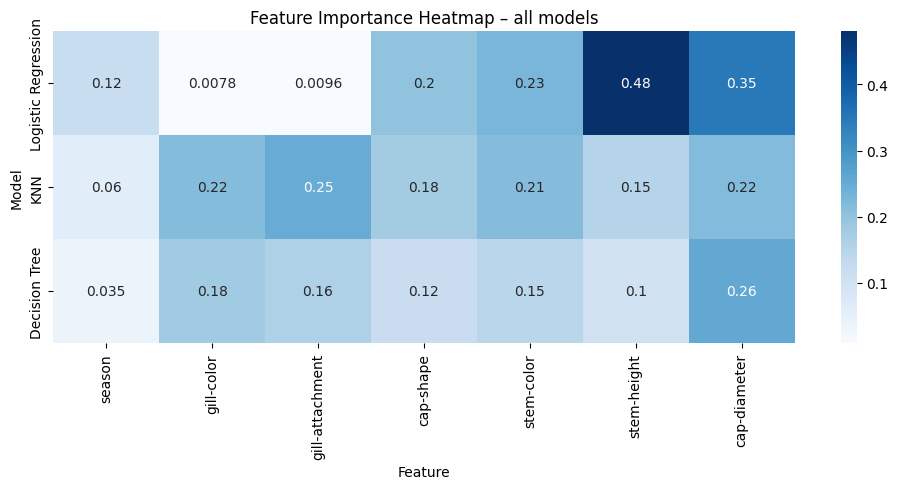

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature-names and Importances
features = X_reduced.columns
importance_knn = result.importances_mean
importance_logreg = np.abs(logistic_regr.coef_[0])
importance_tree = dtree.feature_importances_

df_all = pd.DataFrame({
    'Feature': features,
    'Logistic Regression': importance_logreg,
    'KNN': importance_knn,
    'Decision Tree': importance_tree
})
df_all = df_all.set_index('Feature')

# === Barplot ===
df_all.plot(kind='barh', figsize=(10, 6), color=["#1f77b4", "#ff7f0e", "#2ca02c"])  # gleiche Farben wie ROC
plt.xlabel('Feature Importance')
plt.title('Feature Importance Comparison – Logistic Regression, KNN, Decision Tree')
plt.legend(loc="upper right", fontsize=10)
plt.tight_layout()
plt.savefig("Features_bars.png")
plt.show()

# === Heatmap ===
df_all_sorted = df_all.copy()
df_all_sorted['mean'] = df_all.mean(axis=1)
df_all_sorted = df_all_sorted.sort_values(by='mean', ascending=True)
df_all_sorted = df_all_sorted.drop(columns='mean')

plt.figure(figsize=(10, 5))
sns.heatmap(df_all_sorted.T, annot=True, cmap='Blues')
plt.title('Feature Importance Heatmap – all models')
plt.ylabel('Model')
plt.xlabel('Feature')
plt.tight_layout()
plt.savefig("Features_heatmap.png")
plt.show()


Model Comparison and Discussion

Three classification models were trained and evaluated: Logistic Regression, K-Nearest Neighbors (KNN), and Decision Tree. The target variable was binary (0 = edible, 1 = poisonous), and all features were numerical. The dataset was balanced, allowing fair comparison of precision and recall.


Logistic Regression

This linear model achieved an accuracy of 63.9%. It showed moderate precision and recall but struggled to capture the non-linear structure in the data. While simple and interpretable, it was not suitable for this dataset.

    Precision: 0.65 (poisonous), 0.62 (edible)

    Recall: 0.72 (poisonous), 0.54 (edible)

Conclusion: Logistic Regression serves as a good baseline but lacks performance on complex patterns.


K-Nearest Neighbors (KNN)

KNN achieved the highest accuracy at 96.9%. The model benefits from the numerical and normalized features, and the classes appear to be well-separated in feature space.

    Precision and recall for both classes were above 96%

    Slightly better performance on poisonous class

Conclusion: KNN performed best overall but may become slow with larger datasets due to high computational cost.


Decision Tree

The Decision Tree also performed very well, with 95.5% accuracy. It captured non-linear relationships and interactions automatically and offered good feature interpretability.

    Precision: 0.96 (poisonous), 0.95 (edible)

    Balanced recall and precision

Conclusion: A strong model combining high accuracy and interpretability. A good compromise between performance and explainability.
Summary

    KNN had the highest performance on all metrics but is less scalable.

    Decision Tree was nearly as accurate and more interpretable.

    Logistic Regression underperformed, limited by its linear assumptions.

Each model offers different trade-offs, and the final choice depends on the use case. For structured classification problems with numeric data, KNN and Decision Trees are both strong candidates.

Feature Analysis and Interpretation

To better understand the model behavior, feature importance was analyzed for all three models.


Logistic Regression

The model assigns positive or negative weights to features. Features with large absolute coefficients influence the prediction strongly. In this case, some features had negative weights (indicating correlation with the edible class), while others had positive weights (associated with poisonous mushrooms). However, due to the model’s linearity, interactions between features were not captured.

Conclusion: Useful for identifying overall trends, but limited in interpretability for complex relationships.


K-Nearest Neighbors

Feature importance was evaluated using permutation importance. This method measures how much the model’s accuracy drops when a specific feature is randomly shuffled. The most important features led to noticeable performance drops when permuted, indicating high influence on classification.

Conclusion: KNN relies on multiple features working together. Individual feature effects are harder to isolate, but permutation importance provided robust insights.


Decision Tree

The Decision Tree inherently provides feature importance based on how often and how effectively each feature is used for splitting. In this project, a small number of features dominated the decision-making process, consistent with the KNN analysis.

Conclusion: Clear ranking of influential features. Tree-based models help highlight key decision factors in the dataset.
Cross-Model Comparison

The top features were largely consistent across all models, confirming their relevance. Feature importance visualizations (bar plot and heatmap) showed overlapping priorities, although weightings varied. This agreement across models increases confidence in the selected features and supports trust in the predictions.